# Algoritmo de Bernstein-Vazirani


#### Autor: Fernando Ares Robledo
#### email: fernandoaresrobledo@gmail.com


#### Ultima fecha de modificacion: 23 de abril de 2023

0101
Circuito cuántico de Bernstein-Vazirani:


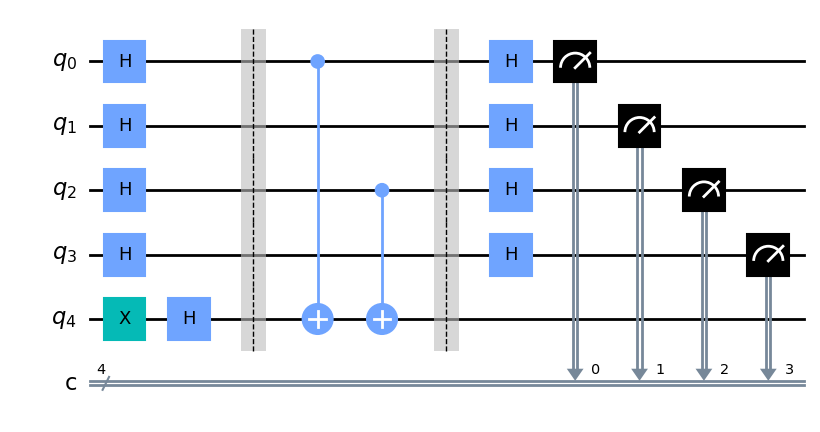

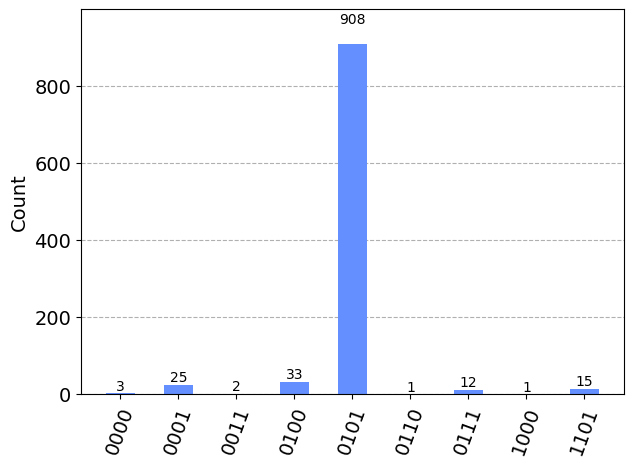


Histograma de resultados:
Resultados:
{'0101': 908, '1101': 15, '0100': 33, '0111': 12, '0001': 25, '1000': 1, '0000': 3, '0110': 1, '0011': 2}
Consultas clásicas necesarias: 4
Consultas cuánticas necesarias: 1


In [5]:
# -*- coding: utf-8 -*-

"""
Nombre del archivo: Bernstein-Vazirani.ipynb

Descripción:
Este código implementa el algoritmo cuántico de Bernstein-Vazirani, que permite encontrar 
una clave secreta de una función lineal en una sola consulta.El algoritmo utiliza un circuito 
cuántico y la librería Qiskit para generar, visualizar y ejecutar el circuito. La clave secreta se 
procesa como una cadena binaria y se emplea para construir el circuito cuántico. Luego, se ejecuta el 
circuito cuántico en un simulador, y se recuperan los resultados para extraer la clave secreta. 
Finalmente, se muestra una comparación entre el número de consultas requeridas por un algoritmo 
clásico y el algoritmo cuántico de Bernstein-Vazirani.

Autor: Fernando Ares Robledo
Fecha de creación: 10/03/2023
"""

import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.providers.aer import QasmSimulator
import matplotlib.pyplot as plt
from qiskit.providers.fake_provider import FakeJakarta,FakeVigo,FakeNairobi
from IPython.display import display
%matplotlib inline
device_backend = FakeJakarta()
sim_vigo = AerSimulator.from_backend(device_backend)

class BernsteinVazirani:
    """Clase que implementa el algoritmo de Bernstein-Vazirani para recuperar una clave secreta de una función 
        lineal.

        Atributos:
        clave_secreta (str): la clave secreta que se quiere recuperar.
        n_cubits (int): el número de qubits utilizado en el circuito cuántico.
        circuito (QuantumCircuit): el circuito cuántico generado para resolver el problema.

        Métodos:
        procesar_clave_secreta(clave_secreta): procesa la clave secreta para que sea una cadena binaria.
        generar_circuito(): genera el circuito cuántico para resolver el problema de Bernstein-Vazirani.
        dibujar_circuito(): dibuja el circuito cuántico generado por la función generar_circuito.
        ejecutar_circuito(): ejecuta el circuito cuántico generado por la función generar_circuito utilizando 
        el simulador QasmSimulator de Qiskit.
        resultados(): ejecuta el circuito cuántico utilizando la función ejecutar_circuito y devuelve los 
        resultados de la simulación, así como un histograma de los resultados.
        comparacion_clasica(clave_secreta): calcula el número de consultas necesarias para resolver el problema 
        de Bernstein-Vazirani de manera clásica.
        """
    def __init__(self, clave_secreta):
        """Constructor de la clase BernsteinVazirani. 
          Crea un nuevo objeto BernsteinVazirani con la clave secreta dada.
        Args:
            clave_secreta (str o int): la clave secreta que se quiere recuperar.
        Raises:
            ValueError: si la clave secreta no es una cadena binaria o un entero.
        Returns:None
        """    
        self.clave_secreta = self.procesar_clave_secreta(clave_secreta)
        self.n_qubits = len(self.clave_secreta)
        self.circuit = self.generar_circuito()

    def procesar_clave_secreta(self,clave_secreta):
        """Procesa la clave secreta para que sea una cadena binaria.
        Args:
            clave_secreta (int o str): la clave secreta que se quiere procesar.
        Raises:
            ValueError: si la clave secreta no es una cadena binaria o un entero.
        Returns:
            str: la clave secreta procesada como una cadena binaria.
        """
        if isinstance(clave_secreta, str) and all([bit in '01' for bit in clave_secreta]):
            return clave_secreta
        elif isinstance(clave_secreta, int):
            return format(clave_secreta, 'b')
        else:
            raise ValueError("Se esperaba un entero o una cadena de texto como clave secreta")

    def generar_circuito(self):
        """Crea el circuito cuantico de berstein vazirani
            return:
                Circuito cuantico que implementa el algoritmo de bersntein vazirani 
        """
        n = self.n_qubits
        clave_secreta = self.clave_secreta
        circuito = QuantumCircuit(n+1, n)

        circuito.h(range(n))
        circuito.x(n)
        circuito.h(n)

        circuito.barrier()

        for i, s in enumerate(reversed(clave_secreta)):
            if s == '1':
                circuito.cx(i, n)

        circuito.barrier()

        circuito.h(range(n))
        circuito.measure(range(n), range(n))

        return circuito

    def dibujar_circuito(self):
        """Dibuka el circuito cuantico generado por la funcion generar_circuito
            usa #quiskit.visualization
            return:
                fig: figura del circuito cuantico
        """
        return display(circuit_drawer(self.circuit, output = "mpl"))

    def ejecutar_circuito(self):
        """Ejecuta el circuito cuantico generado por la funcion generar_circuito utilizando el simulador 
            QasmSimulator. Devuelve los resultados de la simulacion
            return:
                counts (ditc): un diccionario con los resultados de la simulacion, donde las claves son los
                estados medidos y los valores son las veces que se midió cada estado
        """
        simulador = QasmSimulator()
        simulador2 = FakeJakarta()
        circuito_completo= transpile(self.circuit, sim_vigo)
        resultado = sim_vigo.run(circuito_completo, shots=1000).result()
        counts = resultado.get_counts(self.circuit)
        plot_histogram(counts)
        return counts


    def resultados(self):
        """Ejecuta el circuito cuántico utilizando la funcion ejecutar_circuito y devuelve los resultados 
           de la simulacion, asi como un histograma de los resultados
           return: 
               histogram (Figura): una figura de los resultados
               counts (dict): un diccionario con los resultados de la simulacion, donde las claves son los 
                   estados medidos y valores son las veces que se midio cada estado
        """
        counts = self.ejecutar_circuito()
        histogram = plot_histogram(counts,)
        display(histogram) 
        return histogram, counts
    
    def recuperar_clave_secreta(self, resultados):
        """Recupera la clave secreta original a partir de los resultados del algoritmo de Bernstein-Vazirani.
        Args:
            resultados (dict): un diccionario que contiene los resultados de la simulación del circuito cuántico.
        Returns:
            str: la clave secreta original.
        """
        bits = list(resultados.keys())[0] # obtiene los bits de la clave secreta a partir de los resultados
        bits = bits[::-1] # invierte la cadena de bits para que estén en el orden correcto
        clave_secreta = ''.join(bits) # une los bits en una sola cadena de texto
        clave_secreta = int(clave_secreta, 2) # convierte la cadena binaria a un entero
        return clave_secreta
    
    @staticmethod
    def comparacion_clasica(clave_secreta):
        """Calcula el numero de consultas necesarias para resolver el problema de BV
            de manera clasica.
            Arg:
                clave_secreta (st o int): la clave secreta que se quiere recuperar
            return:
                consultas (int): el numero de consultas necesarias para resolver BV clasico
        """
        n = len(str(clave_secreta))
        consultas = 0

        for _ in range(n):
            consultas += 1

        return consultas

def main():
    clave_secreta = "0101"# para cambiar la clave secreta aqui
    bv = BernsteinVazirani(clave_secreta)
    print(clave_secreta)
    print("Circuito cuántico de Bernstein-Vazirani:")
    bv.dibujar_circuito()

    histogram, counts = bv.resultados()
    print("\nHistograma de resultados:")
    

    print("Resultados:")
    print(counts)

    consultas_clasicas = BernsteinVazirani.comparacion_clasica(clave_secreta)
    print(f"Consultas clásicas necesarias: {consultas_clasicas}")
    print("Consultas cuánticas necesarias: 1")

if __name__ == "__main__":
    main()